In [4]:
from sklearn.cluster import dbscan
import h5py
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import shap

from sklearn.metrics import mean_squared_error

from sklearn import metrics,cluster

import warnings
warnings.filterwarnings("ignore")
import umap.umap_ as umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler 

In [5]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)
    
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]


train = load_data('data/train')[all_variables]
test  = load_data('data/test')[all_variables]


print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

#print(train['Truth'])

Shape of training data set: (162500, 160)
Shape of test data set: (160651, 160)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


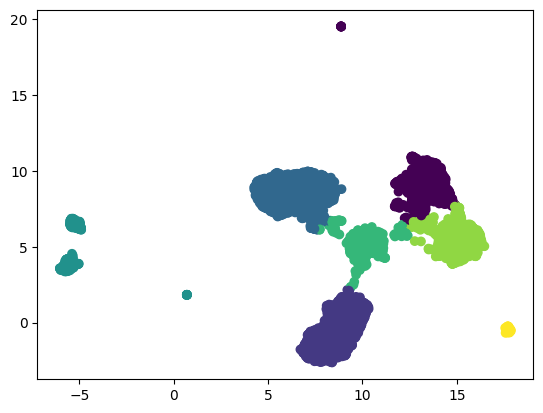

In [6]:
# Assuming you have your data stored in a variable called 'X'
data_scaled = StandardScaler().fit_transform(train[:5000])
# Reduce dimensionality with UMAP
umap_model = umap.UMAP(
    n_components=2,
    min_dist = .1,
    n_neighbors = 10)
umap_embedding = umap_model.fit_transform(data_scaled)
#%%
kmeans = cluster.KMeans(n_clusters=7, random_state=42).fit(umap_embedding)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(umap_embedding[:,0],umap_embedding[:,1],c = kmeans.labels_)

In [7]:
import numpy as np
import umap.umap_ as umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

blind = test[0:10000]

# Assuming you have your data stored in a variable called 'X'
data_scaled = StandardScaler().fit_transform(blind)
data_scaled = pd.DataFrame(data_scaled, columns=blind.columns)
# Reduce dimensionality with UMAP
umap_model = umap.UMAP(
    n_components=2,
    min_dist = .1,
    n_neighbors = 10)
umap_embedding = umap_model.fit_transform(data_scaled)



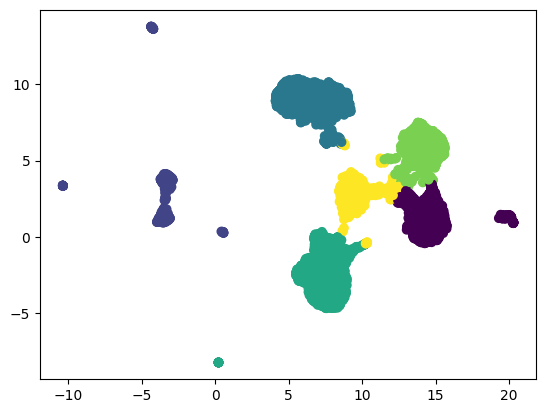

In [8]:
kmeans = cluster.KMeans(n_clusters=6, random_state=42).fit(umap_embedding)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(umap_embedding[:,0],umap_embedding[:,1],c = kmeans.labels_)


In [9]:
#%%
# Calculate feature importance with LDA (unsupervised)
lda_model = LDA()
lda_embedding = lda_model.fit_transform(data_scaled,kmeans.labels_)



In [10]:
# Get feature importance scores
feature_importance = np.abs(lda_model.scalings_)


In [11]:
#%%
# Sort features based on importance scores
sorted_indices = np.argsort(feature_importance,axis=0)[::-1]
test = pd.DataFrame(sorted_indices)
final_dict = {}
for i in range(1,160):
    value = np.sum(test.index.values *np.sum((test == i),axis = 1).values)
    final_dict[train.columns[i]] = value
final_df = pd.DataFrame(final_dict, index=[0])
features = final_df.T.sort_values(by = 0)[:5].index

In [12]:
print(features)

Index(['p_etaClusterLr1', 'p_etaClusterLr2', 'p_widths1', 'p_eClusterLr3',
       'p_phiCalo'],
      dtype='object')
